In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('breastcancer1.csv')

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              564 non-null    float64
 3   texture_mean             561 non-null    float64
 4   perimeter_mean           561 non-null    float64
 5   area_mean                564 non-null    float64
 6   smoothness_mean          566 non-null    float64
 7   compactness_mean         566 non-null    float64
 8   concavity_mean           566 non-null    float64
 9   concave points_mean      562 non-null    float64
 10  symmetry_mean            564 non-null    float64
 11  fractal_dimension_mean   564 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [5]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                5
texture_mean               8
perimeter_mean             8
area_mean                  5
smoothness_mean            3
compactness_mean           3
concavity_mean             3
concave points_mean        7
symmetry_mean              5
fractal_dimension_mean     5
radius_se                  1
texture_se                 1
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [41]:
df['concavity_mean'] = df['concavity_mean'].fillna(df['concavity_mean'].mean())

In [43]:
df.dropna(inplace=True)

In [44]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
perimeter__mean            0
dtype: int64

In [45]:
df.shape

(568, 33)

In [164]:
df.to_csv('Breastcancerprocessed.csv')

In [49]:
X=df[['texture_mean','radius_mean']]

In [51]:
X.size

1136

<Axes: >

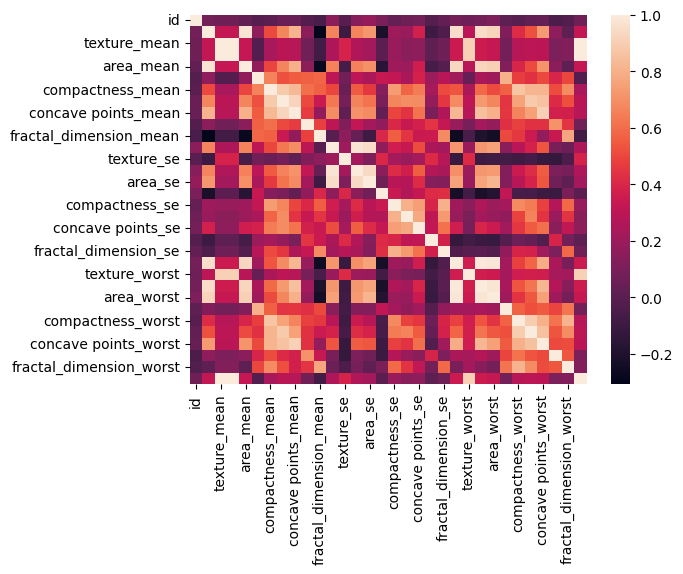

In [62]:
sns.heatmap(df.select_dtypes(exclude=['object']).corr())

In [52]:
y=df['diagnosis']

In [1]:
from sklear.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
scaler.fit_transform(X_test)

ModuleNotFoundError: No module named 'sklear'

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [159]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 99,metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=99)

In [162]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [163]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[66  6]
 [ 9 33]]


0.868421052631579

## for n_neighbors = 99 Accuracy 0.868
## for n_neighbors = 12, Accuracy 0.84
## for n_neighbors = 9, Accuracy 0.82
## for n_neighbors = 7 Accuracy 0.83
## for n_neighbors = 6 Accuracy 0.81




In [92]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 29 ,metric = 'minkowski', p = 2)

classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[60 12]
 [ 8 34]]


0.8245614035087719